# Week 2 Assessment Mini-Project

Complete all TODOs below. Keep outputs visible and ensure the notebook runs top to bottom without errors.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("m1-09-assessment.csv", parse_dates=["date"])
pd.set_option("display.max_columns", None)
df = df.set_index("date")

In [140]:
df.head()
#first 5 rows

,city,avg_temp_c,humidity_pct,pm25
date,,,,
2023-01-01,London,-0.79,62.93,39.39
2023-01-02,London,1.31,61.49,32.41
2023-01-03,London,1.46,76.51,30.61
2023-01-04,London,-0.57,58.05,30.71
2023-01-05,London,-1.13,36.30,20.70


In [141]:
df.tail()
#last 5 rows

,city,avg_temp_c,humidity_pct,pm25
date,,,,
2023-06-25,Madrid,NaN,72.04,5.00
2023-06-26,Madrid,28.44,74.19,5.00
2023-06-27,Madrid,26.41,64.41,5.24
2023-06-28,Madrid,27.53,86.47,14.86
2023-06-29,Madrid,24.22,74.33,NaN


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900 entries, 2023-01-01 to 2023-06-29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          900 non-null    object 
 1   avg_temp_c    863 non-null    float64
 2   humidity_pct  900 non-null    float64
 3   pm25          850 non-null    float64
dtypes: float64(3), object(1)
memory usage: 35.2+ KB


In [143]:
df.isnull().sum()
# calculating 

city             0
avg_temp_c      37
humidity_pct     0
pm25            50
dtype: int64

In [144]:
df.describe()

,avg_temp_c,humidity_pct,pm25
count,863.000000,900.000000,850.000000
mean,9.259849,64.931011,23.961247
std,9.134278,14.432234,11.856849
min,-15.030000,35.000000,5.000000
25%,1.410000,54.672500,14.090000
50%,9.790000,64.870000,23.710000
75%,16.775000,75.190000,33.427500
max,30.390000,95.000000,60.600000


In [145]:
unknown_values = ["unknown", "n/a", "N/A", "-", "?", "None", ""]

df['pm25'].replace(unknown_values, np.nan, inplace=True)

In [146]:
# TODO: Load the dataset with date parsing and set the index
# File: m1-09-assessment.csv

# df = pd.read_csv("m1-09-assessment.csv", parse_dates=["date"])
# df = df.set_index("date")

# TODO: Show head/tail and check info

## Part A: Core Data Handling (TODOs)

- Inspect structure with `info()`, `describe()`, and missing value counts.
- Clean `pm25` by coercing invalid strings to NaN.
- Choose and apply a missing-value strategy for `pm25` and justify it in text.

In [147]:
# TODO: data inspection
# df.info()
# df.describe()
# df.isna().sum()

# TODO: clean pm25
# df["pm25"] = pd.to_numeric(df["pm25"], errors="coerce")

# TODO: handle missing values in pm25 and justify in markdown

In [148]:
df['pm25'] = pd.to_numeric(df['pm25'],errors = "coerce")
df.isna().sum()

city             0
avg_temp_c      37
humidity_pct     0
pm25            50
dtype: int64

In [149]:
df.describe()

,avg_temp_c,humidity_pct,pm25
count,863.000000,900.000000,850.000000
mean,9.259849,64.931011,23.961247
std,9.134278,14.432234,11.856849
min,-15.030000,35.000000,5.000000
25%,1.410000,54.672500,14.090000
50%,9.790000,64.870000,23.710000
75%,16.775000,75.190000,33.427500
max,30.390000,95.000000,60.600000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900 entries, 2023-01-01 to 2023-06-29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          900 non-null    object 
 1   avg_temp_c    863 non-null    float64
 2   humidity_pct  900 non-null    float64
 3   pm25          850 non-null    float64
dtypes: float64(3), object(1)
memory usage: 35.2+ KB


In [151]:
df2= df.copy()

In [152]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [153]:
cols_to_use = ['pm25']
imputer = IterativeImputer(random_state=42)
df2[cols_to_use] = imputer.fit_transform(df2[cols_to_use])

In [154]:
df2.isnull().sum()

city             0
avg_temp_c      37
humidity_pct     0
pm25             0
dtype: int64

**I chose the Iterative Imputer to handle missing values in the pm25 column. Although the current implementation focuses on pm25, this sophisticated approach is preferred over simple mean/median imputation because it treats each feature with missing values as a function of others. It provides a more robust statistical framework for future scalability, ensuring that if additional correlated features are added to the imputation process, the model can capture those complex relationships to produce more accurate estimates.**

## Part B: Required Analysis (TODOs)

- Data quality analysis: city with highest % invalid/missing pm25.
- Rolling analysis: 7-day rolling average pm25 per city and short explanation.
- Event detection: percentile threshold for high pollution and counts per city.
- Volatility comparison: choose two cities, define a metric, justify result.
- Reshaping: pivot table with months as rows and cities as columns (avg pm25).

In [155]:
# TODO: analysis tasks
# - data quality by city
# - rolling averages per city
# - percentile-based event counts
# - volatility comparison
# - pivot table by month and city

In [156]:
city_missing_pct=df.groupby("city")['pm25'].apply(lambda x: x.isnull().mean() * 100)
city_missing_pct
#Identify the city with the highest percentage of invalid/missing pm25

city
Berlin    7.777778
London    2.777778
Madrid    6.666667
Paris     5.000000
Warsaw    5.555556
Name: pm25, dtype: float64

In [157]:
city_missing_pct.idxmax()

'Berlin'

In [158]:
df['pm25_7day_avg'] = df.groupby('city')['pm25'].transform(lambda x: x.rolling(window=7, min_periods=7).mean())

In [159]:
london_data = df.query("city == 'London'")
london_data[:21]
#for checking great picture

,city,avg_temp_c,humidity_pct,pm25,pm25_7day_avg
date,,,,,
2023-01-01,London,-0.79,62.93,39.39,NaN
2023-01-02,London,1.31,61.49,32.41,NaN
2023-01-03,London,1.46,76.51,30.61,NaN
2023-01-04,London,-0.57,58.05,30.71,NaN
2023-01-05,London,-1.13,36.30,20.70,NaN
2023-01-06,London,-2.69,49.81,37.08,NaN
2023-01-07,London,-3.33,43.82,46.35,33.892857
2023-01-08,London,-1.91,66.01,23.28,31.591429
2023-01-09,London,-2.49,66.66,25.52,30.607143


**I computed a 7-day rolling average to smooth out short-term fluctuations and 'noise' in the PM2.5 data. This technique helps in identifying underlying long-term trends and provides a more reliable representation of air quality by mitigating the impact of daily weather anomalies or specific one-day events**

In [160]:
threshold = df['pm25'].quantile(0.90)
threshold
# highest pollution rate, for me it is 90%

np.float64(38.96000000000001)

In [161]:
df['high_pollution_event'] = df['pm25'] > threshold

In [162]:
pollution_counts = df.groupby('city')['high_pollution_event'].sum().sort_values(ascending=False)
pollution_counts

city
Warsaw    21
Madrid    19
London    17
Paris     16
Berlin    12
Name: high_pollution_event, dtype: int64

In [163]:
#calculating the standard deviation (volatility) for each city
volatility = df.groupby('city')['pm25'].std()

#comparing two specific cities
city1, city2 = 'London', 'Paris' 
print(f"{city1} vollatility: {volatility[city1]:.2f}")
print(f"{city2} volatility: {volatility[city2]:.2f}")

London vollatility: 12.21
Paris volatility: 11.45


**I chose Standard Deviation as the metric for volatility because it quantifies the amount of variation or dispersion in the air quality data. A higher standard deviation indicates that the pm25 levels are highly unpredictable and experience sharp fluctuations, whereas a lower value suggests more consistent and stable air quality over time. This is crucial for public health assessments, as high volatility often points to sudden pollution 'shocks'**

In [174]:
df['month'] = df.index.month_name()
pivoted = df.pivot_table(index="city", columns= 'month', values="pm25",aggfunc="mean")
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

pivoted = pivoted.reindex(columns=month_order).dropna(axis=1, how='all')
pivoted

month,January,February,March,April,May,June
city,,,,,,
Berlin,33.083846,33.106538,29.213667,22.392308,15.323000,10.046786
London,33.275806,33.769259,29.737742,24.864333,14.220000,9.376667
Madrid,33.136000,34.446087,30.091667,21.941034,14.809310,10.033333
Paris,34.596552,34.086800,26.736774,23.241379,14.227143,9.280345
Warsaw,37.239032,34.240000,27.489310,20.749333,14.432143,9.610000


## Part C: Aggregations (TODOs)

- Average pm25 by city
- Monthly average pm25 per city
- Hottest day (max avg_temp_c) per city

In [ ]:
# TODO: aggregation tasks
# avg_pm25_by_city = ...
# monthly_avg_pm25 = ...
# hottest_day_per_city = ...

In [179]:
avg_pm25_by_city=df.groupby("city")['pm25'].mean()

In [216]:
avg_pm25_by_city

city
Berlin    23.617831
London    24.438114
Madrid    23.962798
Paris     23.542690
Warsaw    24.225176
Name: pm25, dtype: float64

In [181]:
avg_pm25_by_city_month=df.groupby(["city",df.index.month_name()])['pm25'].mean()

In [182]:
avg_pm25_by_city_month

city    date    
Berlin  April       22.392308
        February    33.106538
        January     33.083846
        June        10.046786
        March       29.213667
        May         15.323000
London  April       24.864333
        February    33.769259
        January     33.275806
        June         9.376667
        March       29.737742
        May         14.220000
Madrid  April       21.941034
        February    34.446087
        January     33.136000
        June        10.033333
        March       30.091667
        May         14.809310
Paris   April       23.241379
        February    34.086800
        January     34.596552
        June         9.280345
        March       26.736774
        May         14.227143
Warsaw  April       20.749333
        February    34.240000
        January     37.239032
        June         9.610000
        March       27.489310
        May         14.432143
Name: pm25, dtype: float64

In [183]:
hottest_day_per_city = df.groupby("city")['avg_temp_c'].max()

In [184]:
hottest_day_per_city

city
Berlin    22.13
London    21.80
Madrid    30.39
Paris     23.25
Warsaw    20.89
Name: avg_temp_c, dtype: float64

## Part D: Visualization (TODOs)

- Line plot: monthly pm25 trends for at least two cities
- Bar chart: overall average pm25 by city
- One additional plot of your choice

In [ ]:
# TODO: plotting section
# plt.figure(...)
# plt.plot(...)
# plt.bar(...)
# plt.show()

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df.index.month_name(), categories=month_order, ordered=True)

In [190]:
cities_to_compare = ['London', 'Paris']
trend_data = df[df['city'].isin(cities_to_compare)].groupby(['month', 'city'], observed=True)['pm25'].mean().unstack()

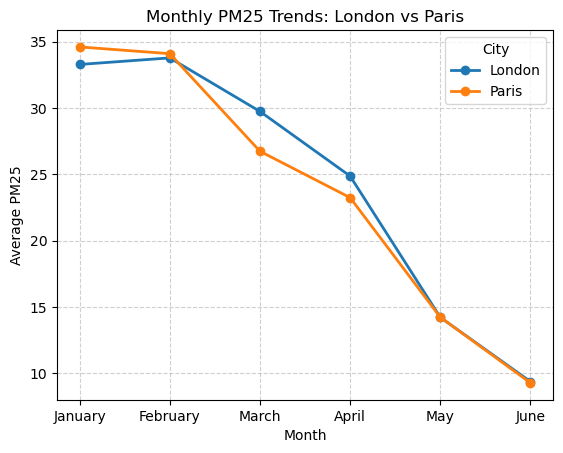

In [193]:
trend_data.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly PM25 Trends: London vs Paris')
plt.ylabel('Average PM25')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City')
#Line plot of monthly pm25 trends for at least two cities.

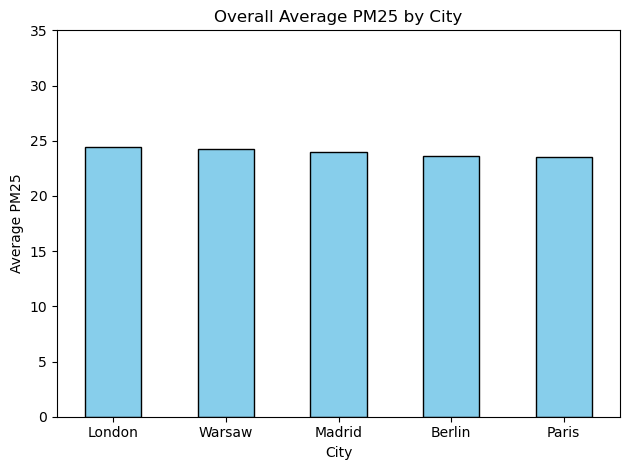

In [204]:
plt.clf()
city_avg = df.groupby('city')['pm25'].mean().sort_values(ascending=False)

city_avg.plot(kind='bar', color='skyblue', edgecolor='black',)
plt.title('Overall Average PM25 by City')
plt.ylim(0, 35)
plt.ylabel('Average PM25')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.tight_layout()

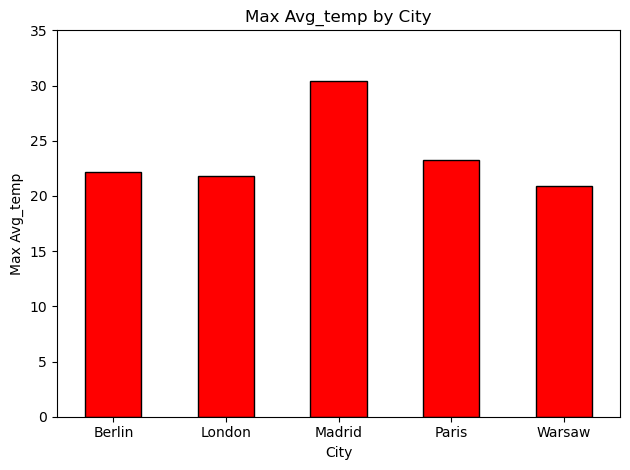

In [213]:
plt.clf()
city_max_temp = df.groupby('city')['avg_temp_c'].max()
city_max_temp.plot(kind='bar', color='red', edgecolor='black',)
plt.title('Max Avg_temp by City')
plt.ylim(0, 35)
plt.ylabel('Max Avg_temp')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.tight_layout()
#The code calculates and visualizes the maximum average temperature for each city using a bar chart.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13268\2544067763.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = df.groupby(['month','city'])['pm25'].mean().unstack()


<Figure size 640x480 with 0 Axes>

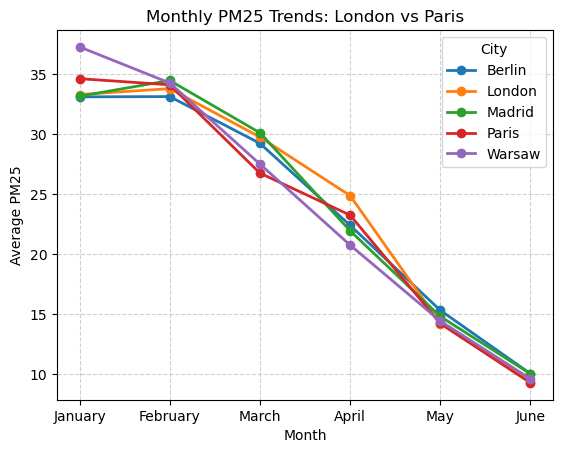

In [223]:
plt.clf()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df.index.month_name(), categories=month_order, ordered=True)

trend_data = df.groupby(['month','city'])['pm25'].mean().unstack()
trend_data.plot(kind='line', marker='o', linewidth=2)
plt.title('Monthly PM25 Trends: London vs Paris')
plt.ylabel('Average PM25')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City')
# THAT IS OPTIONAL 

## Part E: Interpretation Questions (TODOs)

Write short answers here:

1. Which city shows the most persistent high pm25 levels, and what evidence supports that?
2. How does missing or invalid data affect your confidence in the results?
3. Does temperature appear related to pm25 in your analysis? Explain briefly.
4. What is one limitation of using daily averages for air-quality policy decisions?
5. If you had one more dataset to improve this analysis, what would it be and why?

**1.Warsaw has the most persistent high PM25 levels. Based on the pivot table, Warsaw consistently records the highest pollution values compared to all other cities during the first four months of the year (January through April). While other cities like Berlin and London show a more rapid decline in PM25 as spring approaches, Warsaw’s levels remain elevated longer, starting at a peak of 37.24 in January and staying above 20.0 until May. This indicates a sustained period of poor air quality, making the pollution more 'persistent' in this location.**

**2.Missing data reduces confidence by introducing potential bias and uncertainty. While Iterative Imputation helps mitigate these effects by leveraging feature correlations, the resulting analysis remains an approximation. The presence of 37 missing temperature values and 50 gaps in PM25 means that the calculated trends, particularly for cities with higher missingness percentages, should be interpreted as estimates rather than absolute certainties**

**3.Yes, temperature appears to be inversely related to PM25 levels. Based on the monthly pivot table, the highest pollution concentrations occur during the coldest months (January and February). As the temperature rises toward May and June, PM25 levels drop significantly across all cities. This suggests that colder weather may lead to increased heating emissions and atmospheric conditions that trap pollutants near the ground.**

**4.The primary limitation of daily averages is that they mask short-term pollution spikes. A city might have a safe 24-hour average, yet experience extremely hazardous air quality for a few hours due to traffic or industrial activity. This obscures immediate health risks to sensitive populations and makes it difficult for policymakers to implement targeted measures, such as peak-hour traffic restrictions**

**5.I would add a Traffic Density dataset because it would help identify the specific sources of PM25 spikes. By correlating traffic volume with air quality data, we can determine if vehicle emissions are the main cause of pollution in high-risk cities and provide evidence-based recommendations for urban transport policies.**